In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('../data/raw/pd_speech_features.csv')
df.columns = df.iloc[0]
df = df[1:]

In [44]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [45]:
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\bert_\AppData\Local\Temp\ipykernel_9796\1277559549.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [46]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [47]:
df_num = df.drop(columns=cat_cols)

In [48]:
df = df.drop(columns=['id', 'gender'])

In [49]:
corr_matrix = df_num.corr()

#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.show()



In [50]:
# Calculate correlation matrix
correlation_matrix = df.corr().abs()

# Get the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Set the correlation threshold
threshold = 0.8

# Create a list to store the columns to drop
to_drop = set()

# Loop over each column
for i in range(len(upper_tri.columns)):
    # If the column is not already marked for dropping
    if upper_tri.columns[i] not in to_drop:
        # Find all columns that are highly correlated with this column
        high_corr_features = upper_tri.columns[upper_tri.iloc[:, i] > threshold].tolist()
        
        # Add these columns to the 'to_drop' set, except the current column (i.e., retain one feature)
        to_drop.update(set(high_corr_features))

# Drop the columns
df_clean = df.drop(columns=to_drop)

print(f"Columns dropped: {list(to_drop)}")
print(f"Columns retained: {df_clean.columns.tolist()}")

Columns dropped: ['det_LT_entropy_shannon_9_coef', 'tqwt_TKEO_std_dec_1', 'app_LT_TKEO_mean_5_coef', 'tqwt_entropy_log_dec_13', 'app_LT_entropy_shannon_3_coef', 'tqwt_entropy_log_dec_4', 'tqwt_entropy_log_dec_2', 'Ed_8_coef', 'tqwt_minValue_dec_35', 'tqwt_maxValue_dec_8', 'app_det_TKEO_mean_9_coef', 'app_LT_TKEO_mean_2_coef', 'tqwt_TKEO_std_dec_35', 'tqwt_TKEO_mean_dec_34', 'tqwt_stdValue_dec_14', 'det_TKEO_std_3_coef', 'tqwt_maxValue_dec_19', 'det_LT_entropy_log_5_coef', 'tqwt_minValue_dec_5', 'tqwt_minValue_dec_23', 'tqwt_kurtosisValue_dec_34', 'app_entropy_shannon_10_coef', 'tqwt_entropy_log_dec_28', 'tqwt_minValue_dec_19', 'tqwt_maxValue_dec_5', 'tqwt_kurtosisValue_dec_30', 'app_entropy_shannon_7_coef', 'tqwt_minValue_dec_8', 'det_LT_entropy_shannon_6_coef', 'tqwt_maxValue_dec_14', 'app_entropy_log_1_coef', 'tqwt_entropy_log_dec_22', 'tqwt_entropy_log_dec_33', 'tqwt_entropy_log_dec_17', 'locPctJitter', 'tqwt_maxValue_dec_34', 'det_TKEO_mean_5_coef', 'tqwt_TKEO_std_dec_11', 'app_det

In [51]:
df_clean.head()

,PPE,DFA,RPDE,stdDevPeriodPulses,ddpJitter,ddaShimmer,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,meanIntensity,f1,...,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_36,class
1,0.85247,0.71826,0.57227,0.000087,0.00200,0.09034,0.036223,18.995,72.465512,539.342735,...,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,2.6445,18.9405,1
2,0.76686,0.69481,0.53966,0.000073,0.00157,0.06961,0.017974,21.497,71.528945,564.363615,...,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,3.6107,45.1780,1
3,0.85083,0.67604,0.58982,0.000060,0.00171,0.15282,0.026313,17.651,68.086583,548.444604,...,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,2.3308,4.7666,1
4,0.41121,0.79672,0.59257,0.000183,0.00446,0.07185,0.042003,19.865,79.190593,819.529588,...,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.5664,4.0603,1
5,0.32790,0.79782,0.53028,0.002669,0.00499,0.08728,0.027139,19.557,79.183495,846.796144,...,1.9056,2.2214,2.0588,1.8157,1.7577,1.8821,7.8832,5.8416,6.1164,1


In [52]:
y = df_clean.pop('class')

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

In [54]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_train_preds = rfc.predict(X_train)
y_val_preds = rfc.predict(X_val)

In [58]:
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
accuracy = acs(y_train, y_train_preds)
F1 = f1s(y_train, y_train_preds)
conf_matrix = confusion_matrix(y_train, y_train_preds)
report = classification_report(y_train, y_train_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {F1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 1.0000
F1: 1.0000
Confusion Matrix:
[[125   0]
 [  0 358]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       358

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



In [60]:
accuracy = acs(y_val, y_val_preds)
F1 = f1s(y_val, y_val_preds)
conf_matrix = confusion_matrix(y_val, y_val_preds)
report = classification_report(y_val, y_val_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {F1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8843
F1: 0.9286
Confusion Matrix:
[[16 13]
 [ 1 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        29
           1       0.88      0.99      0.93        92

    accuracy                           0.88       121
   macro avg       0.91      0.77      0.81       121
weighted avg       0.89      0.88      0.87       121



ROC AUC Score: 1.0000


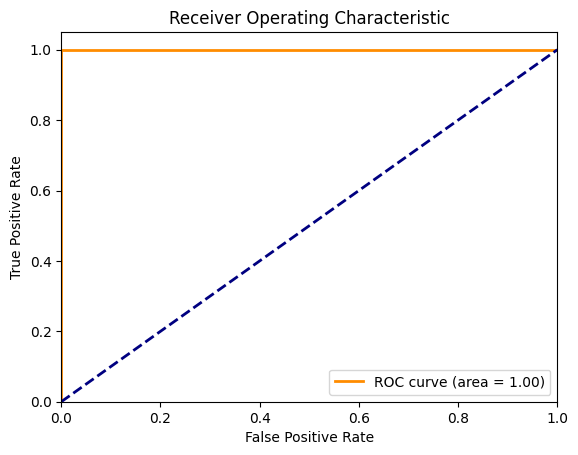

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the probability scores for the test set
y_train_prob = rfc.predict_proba(X_train)[:, 1]  # Probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_train, y_train_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

ROC AUC Score: 0.9674


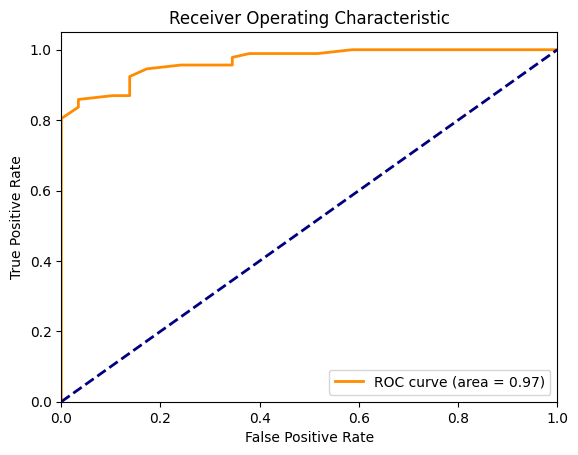

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get the probability scores for the test set
y_valid_prob = rfc.predict_proba(X_val)[:, 1]  # Probability estimates for the positive class

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_val, y_valid_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_valid_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()